In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from datetime import datetime

In [36]:
#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

today = datetime.now().strftime('%d-%m-%Y')
week_num = datetime.now().strftime('%W')

risk_set_a = set(['1H','2H','3H'])
risk_set_b = set(['4H','5H','6V','7V','8H'])
risk_set_c = set(['9V','10V'])
risk_set_d = set(['11H','11V','12H','12V','13aH','13aV','13bH','13bV','14H','14V','15V','16V','17V','18H','18V','19V','20H','20V'])
risk_set_e = set(['21V','22V','23V','24V','25V','26V','27V','28V','29H','30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H',
             '38V','39H','39V','40H','40V','41H','41V','42H','42V','43H','43V'])
risk_set_f = set(['44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V','55V','56V','57H','57V','58H'])
risk_set_g = set(['59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V','70V','71V','72V','73H'])
risk_set_h = set(['74V','75H','76H','76V','77V'])
risk_set_i = set(['78V','79H','79V','80H'])


In [37]:
week_num

'21'

In [38]:
PRACTICE = 'All'
FOLDER = '/230518'

In [39]:
os.chdir(u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/'+PRACTICE+FOLDER)

In [40]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/All/230518'

In [41]:
iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,24,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]

all_set = set()

all_set.update(iot_set)
all_set.update(cloud_set)
all_set.update(connectivity_set)
all_set.update(eit_set)
all_set.update(uc_set)

req_ref_list = list()

first = True
file_count = 0
product_id = 0

for filename in os.listdir(os.getcwd()):
    df = pd.read_excel(filename, sheet_name=None)
    
    file_count = file_count + 1
    
    sheet_names = df.keys()
    sheets = sheet_names[4:-1]

    print filename
    
    product_id = int(filename[11:14])
    print product_id
    all_set.remove(product_id)

    entity_count = len(sheets)
    print("Entity count: {0:d}".format(entity_count))
    
    for sh in sheets:
        print sh
        if sh == u'PII Data Record': #this is an odd bug!
            print "this is odd! PII Data"
            continue
        df[sh].insert(loc=0, column='Filename', value=filename)
        df[sh].insert(loc=1, column='Product ID', value=product_id)
        df[sh].drop(0, inplace=True)
        df[sh]['Response'].fillna('No Response', inplace=True)
        df[sh]['Remediation Project Ref'].fillna('No Response', inplace=True)
        df[sh]['Response Comments'].fillna('', inplace=True)
        df[sh]['Delivery Date'].fillna('', inplace=True)
        df[sh]['Compliance Assessment'].fillna('N/A', inplace=True)
        if first:
            out_df = df[sh][['Filename',\
                             'Product ID',\
                             'Req Ref',\
                             'Req nr',\
                             'Compliance Assessment',\
                             'Response',\
                             'Response Comments',\
                             'Delivery Date',\
                             'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            
            req_ref_list.extend(list(df[sh]['Req Ref']))
            
            first = False
        else:
            cp_df = df[sh][['Filename',\
                            'Product ID',\
                            'Req Ref',\
                            'Req nr',\
                            'Compliance Assessment',\
                            'Response',\
                            'Response Comments',\
                            'Delivery Date',\
                            'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count

            req_ref_list.extend(list(df[sh]['Req Ref']))

            out_df = pd.concat([out_df, cp_df], axis=0, ignore_index=True, copy=True)
            
print file_count

GDPR-RS-EPS147-PCI (Payment Card Industry)-V4.0 reviewed 23.05 IB.xlsx
147
Entity count: 1
A - PCI Services
GDPR-RS-EPS109-SME SOHO-V4.1 REVIEWED 160518.xlsx
109
Entity count: 1
A - SME SOHO
GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(22-05-2018).xlsx
59
Entity count: 1
A - Primary Storage
GDPR-RS-EPS068-GDSP IT-V4.1 REVIEWED 160518.xlsx
68
Entity count: 5
A - Portal
B - Business Logic
C - Data Exposure
D - NW Integration
E - Database
GDPR-RS-EPS129-Service Now-V4.0 RELEASED 180518.xlsx
129
Entity count: 1
A - Service Now
GDPR-RS-EPS021-VTR-V5.2.xlsx
21
Entity count: 4
A - Portal
B - Business Logic
C - VTR App Server
D - Database
GDPR-RS-EPS176-IoT-Analytics-V4.0 REVIEWED-(22-05-2018).xlsx
176
Entity count: 1
A - IoT Analytics
GDPR-RS-EPS130-GEO Remedy-V4.0 RELEASED 080518.xlsx
130
Entity count: 1
A - Remedy
GDPR-RS-EPS071-MRD-Verint-V4.0 Reviewed 23.05 IB.xlsx
71
Entity count: 5
A - Portal
B - Business Logic
C - MRD-V
D - Database
E - Miscellaneous
GDPR-RS-EPS067-IITC-V4.1 REVIEWED 

In [42]:
#missing products
all_set

{14, 16, 24, 101, 116, 117, 193, 194, 195}

In [43]:
len(req_ref_list)

7012

In [44]:
duplicates = set([x for x in req_ref_list if req_ref_list.count(x) > 1])

if len(duplicates) > 0:
    print duplicates
    sys.exit("EXIT: duplicates found")

In [45]:
iot_set

{67, 68, 89, 90, 91, 94, 97, 101, 102, 103, 109, 110}

In [46]:
#out_df[out_df['Req Ref'].str.contains("EPS118-PCA-76V")]

#add product column
out_df['Product Ref'] = out_df['Req Ref'].str.slice(0, -2)

out_df['Product ID'] = out_df['Req Ref'].str.slice(3, 6)

out_df['Category'] = out_df['Req Ref'].str.slice(7, 10)

out_df['Category'].replace('-PC', 'PCA', inplace=True)
out_df['Category'].replace('-SC', 'SCA', inplace=True)

#out_df.drop_duplicates(['Product Ref'], keep='first', inplace=True)

mapping = {'No Response':'No Project Code'}

out_df['Orphan'] = out_df['Remediation Project Ref'].map(lambda x: mapping.get(x, 'Project Code Allocated'))

#out_df[out_df['Product ID'] == '022'].head(50)
#out_df.head()

In [47]:
def return_practice( prod_id ):
    #print int(prod_id)
    if int(prod_id) in iot_set:
        return 'IoT'
    elif int(prod_id) in cloud_set:
        return 'Cloud'
    elif int(prod_id) in connectivity_set:
        return 'Connectivity'
    elif int(prod_id) in eit_set:
        return 'EIT'
    elif int(prod_id) in uc_set:
        return 'UC'
    else:
        print "Unknown Practice"
        return 'Unknown Practice'

out_df['Product ID'].dropna(inplace=True)    
    
out_df['Practice'] = out_df['Product ID'].map(lambda x: return_practice(x))

In [48]:
def return_risk_set( req_id ):
    if req_id in risk_set_a:
        return 'A'
    elif req_id in risk_set_b:
        return 'B'
    elif req_id in risk_set_c:
        return 'C'
    elif req_id in risk_set_d:
        return 'D'
    elif req_id in risk_set_e:
        return 'E'
    elif req_id in risk_set_f:
        return 'F'
    elif req_id in risk_set_g:
        return 'G'
    elif req_id in risk_set_h:
        return 'H'
    elif req_id in risk_set_i:
        return 'I'
    else:
        return 'UNKNOWN'
    
out_df['Risk Category'] = out_df['Req nr'].map(lambda x: return_risk_set(x))

    

In [49]:
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category
0,NON-COMPLIANT,2018-05-15 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,EPS-PCA-1H,EPS147-PCA-1H-A,1H,Acknowledged,,EPS147-PCA-1H,PCA,Project Code Allocated,UC,A
1,NON-COMPLIANT,2018-05-18 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-4H,EPS147-PCA-4H-A,4H,Acknowledged,,EPS147-PCA-4H,PCA,Project Code Allocated,UC,B
2,PARTIALLY COMPLIANT,,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57H-A,57H,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57H,PCA,No Project Code,UC,F
3,PARTIALLY COMPLIANT,,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57V-A,57V,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57V,PCA,No Project Code,UC,F
4,PARTIALLY COMPLIANT,2018-10-31 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-57H,EPS147-PCA-58H-A,58H,Acknowledged,,EPS147-PCA-58H,PCA,Project Code Allocated,UC,F


In [50]:
def return_h_or_v( req_id ):
    req_id_str = str(req_id)
    if "H" in req_id_str:
        return 'HORIZONTAL'
    elif "V" in req_id_str:
        return 'VERTICAL'
    else:
        return 'UNKNOWN'
    
out_df['Horizontal / Vertical'] = out_df['Req nr'].map(lambda x: return_h_or_v(x))


In [51]:
out_df['Approved by DPO:'] = ""
out_df['If Approved, change to ?'] = ""
out_df['New Comment to be inserted into RS and DPIA'] = ""

In [52]:
#FIXME: Bug!
out_df['Product ID'].fillna('dropme',inplace=True)

out_df = out_df[out_df['Product ID'] != 'dropme'].copy()


In [53]:
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,2018-05-15 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,EPS-PCA-1H,EPS147-PCA-1H-A,1H,Acknowledged,,EPS147-PCA-1H,PCA,Project Code Allocated,UC,A,HORIZONTAL,,,
1,NON-COMPLIANT,2018-05-18 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-4H,EPS147-PCA-4H-A,4H,Acknowledged,,EPS147-PCA-4H,PCA,Project Code Allocated,UC,B,HORIZONTAL,,,
2,PARTIALLY COMPLIANT,,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57H-A,57H,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57H,PCA,No Project Code,UC,F,HORIZONTAL,,,
3,PARTIALLY COMPLIANT,,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57V-A,57V,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57V,PCA,No Project Code,UC,F,VERTICAL,,,
4,PARTIALLY COMPLIANT,2018-10-31 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-57H,EPS147-PCA-58H-A,58H,Acknowledged,,EPS147-PCA-58H,PCA,Project Code Allocated,UC,F,HORIZONTAL,,,


In [54]:
out_df['Delivery Date'].replace(to_replace='25/5//18', 
                                value=datetime(2018,5,25), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace=['GE-PCA-75H', 'GE-PCA-52H'], 
                                value=datetime(2018,5,18), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace='11th May 2018', 
                                value=datetime(2018,5,11), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace='30th April 2018', 
                                value=datetime(2018,4,18), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace='22nd May 2018', 
                                value=datetime(2018,5,22), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace='22nd May', 
                                value=datetime(2018,5,22), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)


In [55]:
out_df.loc[out_df['Category'] == 'SCA','Horizontal / Vertical'] = 'VERTICAL'

In [56]:
out_df.loc[(out_df['Category'] == 'SCA')&
           (out_df['Compliance Assessment'] == 'N/A'),'Compliance Assessment'] = '0 - n/a'


In [57]:
out_df.loc[(out_df['Horizontal / Vertical'] == 'HORIZONTAL')&
           (out_df['Delivery Date'] == 'tbc'),'Delivery Date'] = datetime(2018,5,18)

out_df.loc[(out_df['Horizontal / Vertical'] == 'HORIZONTAL')&
           (out_df['Delivery Date'] == 'TBC'),'Delivery Date'] = datetime(2018,5,18)

out_df.loc[(out_df['Horizontal / Vertical'] == 'HORIZONTAL')&
           (out_df['Delivery Date'] == ''),'Delivery Date'] = datetime(2018,5,18)

out_df.loc[(out_df['Horizontal / Vertical'] == 'VERTICAL')&
           (out_df['Delivery Date'] == 'tbc'),'Delivery Date'] = datetime(2018,10,30)

out_df.loc[(out_df['Horizontal / Vertical'] == 'VERTICAL')&
           (out_df['Delivery Date'] == 'TBC'),'Delivery Date'] = datetime(2018,10,30)

out_df.loc[(out_df['Horizontal / Vertical'] == 'VERTICAL')&
           (out_df['Delivery Date'] == ''),'Delivery Date'] = datetime(2018,10,30)


In [58]:
out_df['Delivery Date'].value_counts()

2018-10-31    1918
2018-05-18    1420
2018-10-30     867
2018-05-25     534
2018-11-20     386
2018-04-30     332
2018-05-11     193
2018-09-25     178
2018-05-04     155
2018-05-22     130
2018-06-30     113
2018-04-27      98
2018-03-31      98
2018-05-15      97
2018-05-01      83
2018-07-30      68
2018-02-28      50
2018-10-19      36
2018-04-18      33
2018-07-07      32
2018-07-03      30
2018-05-31      24
2017-04-30      24
2018-09-11      22
2018-07-31      14
2018-06-04      12
2018-05-02      10
2018-06-29       9
2018-06-08       8
2018-08-31       6
2017-10-31       4
2018-06-15       4
2018-04-03       4
2018-03-30       4
2018-05-30       3
2018-02-08       3
2018-03-28       2
2018-03-07       2
2018-07-12       1
2018-07-08       1
2018-06-19       1
2018-07-10       1
2018-07-11       1
2018-07-09       1
Name: Delivery Date, dtype: int64

In [70]:
"""
'NON-COMPLIANT':5, 
    'NON-COMPLIANT ':5, 
    'NON-COMPLIANT f':5, 
    'NON-COMPLIANT(F)':5, 
    'PARTIALLY COMPLIANT':4, 
    'PARTIALLY COMPLIANT ':4, 
    'PARTIALLY COMPLIANT f':4,
    'PARTIALLY COMPLIANT(F)':4,
    'COMPLIANT':3,
    'FULLY COMPLIANT':3,
    'FULLY COMPLIANT ':3,
    'FULLY COMPLIANT f':3,
    'TRANSFER':2,
    'RESOLVED':2,
    'N/a':1,
    'N/A':1
"""

out_df['Compliance Assessment'].replace(to_replace='Fully compliant', 
                                value='FULLY COMPLIANT', 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT                                             2654
NON-COMPLIANT                                                   1548
4 - Broadly adequate / Observation                               835
3 - Partially adequate / Minor Non-Conformity (low severity)     478
PARTIALLY COMPLIANT f                                            368
PARTIALLY COMPLIANT                                              318
NON-COMPLIANT f                                                  262
2 - Inadequate / Minor Non-Conformity (high severity)            261
N/A                                                              130
1 - Very Inadequate / Major Non-Conformity                        91
NON-COMPLIANT                                                     40
FULLY COMPLIANT                                                   19
COMPLIANT                                                          4
N/a                                                                3
0 - n/a                           

In [71]:
output_writer = pd.ExcelWriter('../'+PRACTICE+'-REMEDIATION-STATS-Week'+week_num+'-'+today+'.xlsx')
out_df.to_excel(output_writer, 'REMEDIATION STATS')
output_writer.save()

Text(0.5,1,'Chart to show all requirements and their response types: All 24-05-2018')

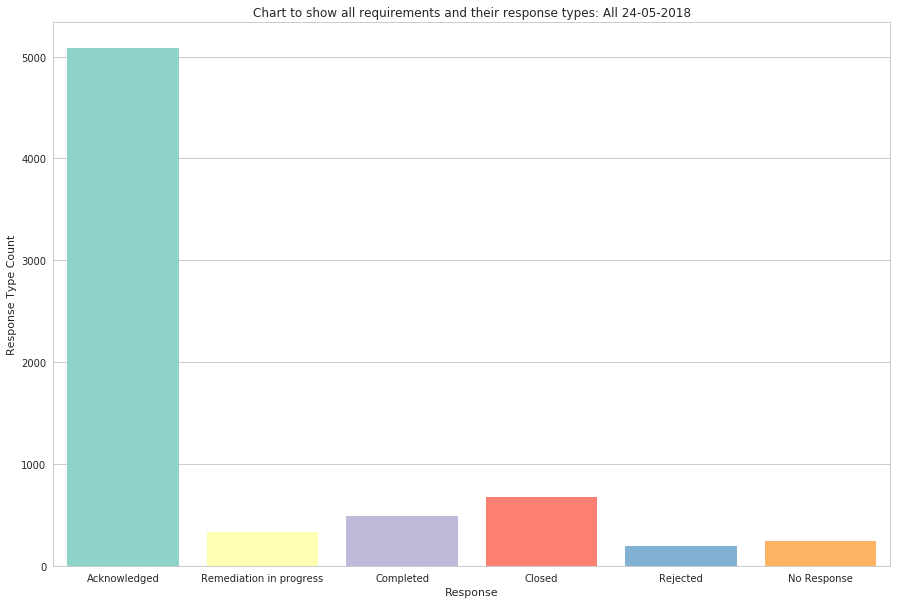

In [72]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Response', saturation=1, palette='Set3',
                  order=['Acknowledged','Remediation in progress','Completed',
                         'Closed','Rejected','No Response'])
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all requirements and their response types: "+PRACTICE+" "+today)

In [73]:
fig.savefig("../"+PRACTICE+"-fig-"+today+".png")

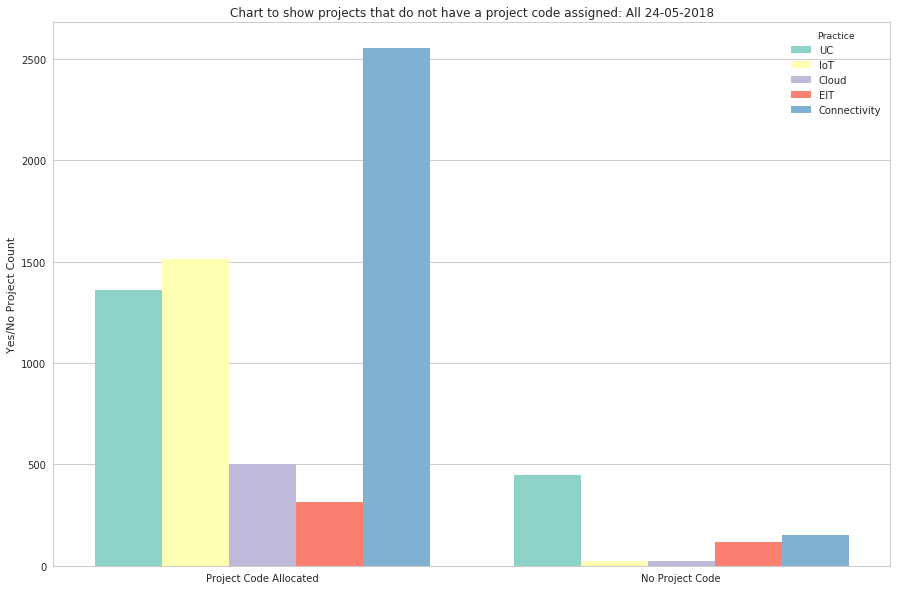

In [74]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Orphan', hue='Practice',saturation=1, palette='Set3')
ax.set_ylabel("Yes/No Project Count")
ax.set_xlabel("")
ax.set_title("Chart to show projects that do not have a project code assigned: "+PRACTICE+" "+today)

fig.savefig("../"+PRACTICE+"-project-codes-fig-"+today+".png")

In [75]:
out_df[out_df['Practice']=='Unknown Practice']

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA


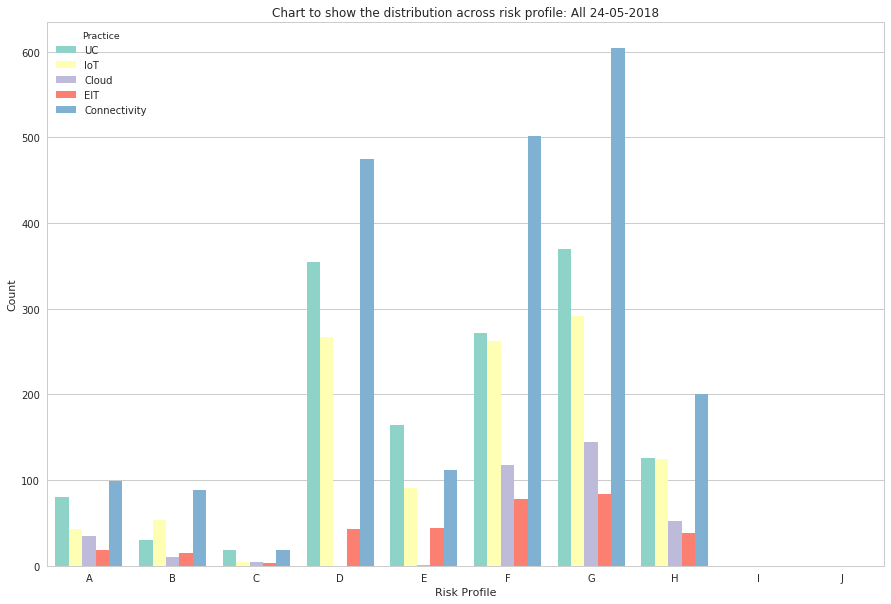

In [76]:
#out_df[out_df['Category']=='PCA']['Risk Category'].value_counts(dropna=False,sort=False)

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df[out_df['Category']=='PCA'], ax=ax, x='Risk Category', 
                   hue='Practice',saturation=1, palette='Set3',
                   order=['A','B','C','D','E','F','G','H','I','J'])
ax.set_ylabel("Count")
ax.set_xlabel("Risk Profile")
ax.set_title("Chart to show the distribution across risk profile: "+PRACTICE+" "+today)

fig.savefig("../"+PRACTICE+"-risk-cats-fig-"+today+".png")

In [77]:
#pd.get_dummies(out_df['Response'])
out_df['Response'].value_counts()

Acknowledged               5083
Closed                      673
Completed                   490
Remediation in progress     329
No Response                 240
Rejected                    197
Name: Response, dtype: int64

In [78]:
COLUMNS = {'PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC'}

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

req_content = ['']
vertical = [15, ]

uc_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)


In [79]:
uc_risk_df

,PRIVACY_REQUIREMENT_CONTENT,VERTICAL,NC,HYBRID,PC,REQ_NO,HORIZONTAL
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,2018-05-15 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,EPS-PCA-1H,EPS147-PCA-1H-A,1H,Acknowledged,,EPS147-PCA-1H,PCA,Project Code Allocated,UC,A,HORIZONTAL,,,
1,NON-COMPLIANT,2018-05-18 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-4H,EPS147-PCA-4H-A,4H,Acknowledged,,EPS147-PCA-4H,PCA,Project Code Allocated,UC,B,HORIZONTAL,,,
2,PARTIALLY COMPLIANT,2018-05-18 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57H-A,57H,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57H,PCA,No Project Code,UC,F,HORIZONTAL,,,
3,PARTIALLY COMPLIANT,2018-10-30 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57V-A,57V,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57V,PCA,No Project Code,UC,F,VERTICAL,,,
4,PARTIALLY COMPLIANT,2018-10-31 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-57H,EPS147-PCA-58H-A,58H,Acknowledged,,EPS147-PCA-58H,PCA,Project Code Allocated,UC,F,HORIZONTAL,,,


In [100]:
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,2018-05-15 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,EPS-PCA-1H,EPS147-PCA-1H-A,1H,Acknowledged,,EPS147-PCA-1H,PCA,Project Code Allocated,UC,A,HORIZONTAL,,,
1,NON-COMPLIANT,2018-05-18 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-4H,EPS147-PCA-4H-A,4H,Acknowledged,,EPS147-PCA-4H,PCA,Project Code Allocated,UC,B,HORIZONTAL,,,
2,PARTIALLY COMPLIANT,2018-05-18 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57H-A,57H,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57H,PCA,No Project Code,UC,F,HORIZONTAL,,,
3,PARTIALLY COMPLIANT,2018-10-30 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57V-A,57V,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57V,PCA,No Project Code,UC,F,VERTICAL,,,
4,PARTIALLY COMPLIANT,2018-10-31 00:00:00,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-57H,EPS147-PCA-58H-A,58H,Acknowledged,,EPS147-PCA-58H,PCA,Project Code Allocated,UC,F,HORIZONTAL,,,
